We solve a diffusion equation with source term: $u_t=u^2+u_{xx}$, on $[-1,1]$ subject to homogeneous Dirichlet conditions. 

In [1]:
m = 100
include("../FNC.jl")
x,Dx,Dxx = FNC.diffcheb(m,[-1,1]);

In [2]:
extend(v) = [0;v;0];  # extend to boundary
chop(u) = u[2:m];     # discard boundary
ODE = function (v,p,t) 
    u = extend(v)
    uxx = Dxx*u
    f = @.u^2 + uxx
    return chop(f)
end

#3 (generic function with 1 method)

All the pieces are now in place to define and solve the IVP.

In [3]:
u0 = @. 6*(1-x^2)*exp(-4*(x-.5)^2)

using DifferentialEquations
V = solve(ODEProblem(ODE,chop(u0),(0.,1.5)));

Extend the solution to the boundaries at each time, then plot.

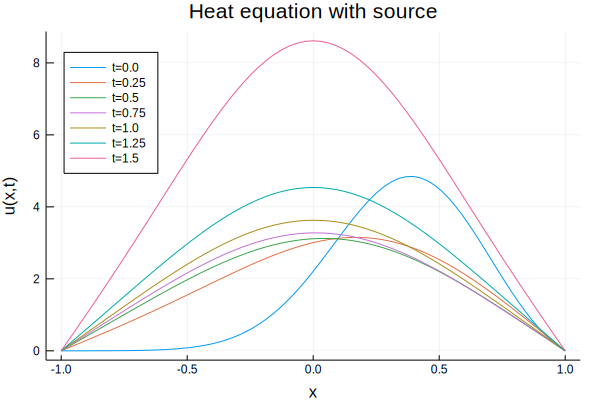

In [4]:
t = range(0,stop=1.5,length=7) 
U = hcat( (extend(V(t)) for t in t)... )

using Plots
plot(x,U,label=["t=$t" for t in t],
    xaxis=("x"), yaxis=("u(x,t)"), title="Heat equation with source",leg=:topleft)

An animation better captures how the source term takes over gradually but at an accelerating rate. 

In [5]:
an = @animate for t = range(0,stop=1.5,length=100)
    plot(x,extend(V(t)),label="t=$(round(t,digits=3))",
        xaxis=("x"), yaxis=([0,10],"u(x,t)"), title="Heat equation with source",leg=:topleft)
end
gif(an,"molbratu.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/chapter11/molbratu.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/chapter11/molbratu.gif")